In [ ]:
# DRAFT experiments for modifying orbital parameters

In [1]:
using SpeedyWeather
using Dates
using GeoMakie
using CairoMakie

In [2]:
# 1. Define the grid and components
spectral_grid = SpectralGrid(trunc=31, nlayers=8)
output = NetCDFOutput(spectral_grid, PrimitiveWetModel, id="orbital_exp", output_dt=Minute(180))
add!(output, SpeedyWeather.TemperatureOutput(), SpeedyWeather.LargeScalePrecipitationOutput())  # output also temperature and precip

NetCDFOutput{Field{Float32, 1, Vector{Float32}, FullGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}}
├ status: inactive/uninitialized
├ write restart file: true (if active)
├ interpolator: AnvilInterpolator{Float32, SpeedyWeather.RingGrids.GridGeometry{OctahedralGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}, Vector{Float32}, Vector{Int64}}, SpeedyWeather.RingGrids.AnvilLocator{Float32, Vector{Float32}, Vector{Int64}}}
├ path: output.nc (overwrite=false)
├ frequency: 10800 seconds
└┐ variables:
 ├ v: meridional wind [m/s]
 ├ humid: specific humidity [kg/kg]
 ├ temp: temperature [degC]
 ├ u: zonal wind [m/s]
 ├ pres: surface pressure [hPa]
 ├ precip_cond: accumulated large-scale precipitation [mm]
 └ vor: relative vorticity [s^-1]

In [3]:
# 2. Create land and ocean models
temperature = LandBucketTemperature(spectral_grid)
soil_moisture = LandBucketMoisture(spectral_grid)
land = LandModel(spectral_grid; temperature, soil_moisture)
ocean = SlabOcean(spectral_grid)

SlabOcean{Float32} <: AbstractOcean
├ temp_equator::Float32 = 302.0
├ temp_poles::Float32 = 273.0
├ specific_heat_capacity::Float32 = 4184.0
├ mixed_layer_depth::Float32 = 10.0
├ density::Float32 = 1000.0
├ mask::Bool = false
└ heat_capacity_mixed_layer::Float32 = 4.184e7

In [4]:
# 3. Make parameterisation choices
large_scale_condensation = ImplicitCondensation(spectral_grid)
convection = SimplifiedBettsMiller(spectral_grid)

SimplifiedBettsMiller{Float32, NoSurfacePerturbation} <: SpeedyWeather.AbstractConvection
├ nlayers::Int64 = 8
├ time_scale::Second = 14400 seconds
├ relative_humidity::Float32 = 0.7
└ surface_temp_humid::NoSurfacePerturbation = NoSurfacePerturbation <: SpeedyWeather.AbstractSurfacePerturbation


In [46]:
# 4. Modify orbital parameter (e.g., halve axial tilt or halve rotation and double length of day)
earth = Earth(spectral_grid,axial_tilt=11.7f0) # unit is degrees
#earth = Earth(spectral_grid,rotation=3.645f-5,length_of_day=127800.0f0) # units are rad/s and s, respectively

Earth{Float32} <: SpeedyWeather.AbstractPlanet
├ rotation::Float32 = 7.29e-5
├ gravity::Float32 = 9.81
├ daily_cycle::Bool = true
├ length_of_day::Second = 86400 seconds
├ seasonal_cycle::Bool = true
├ length_of_year::Second = 31557600 seconds
├ equinox::DateTime = 2000-03-20T00:00:00
├ axial_tilt::Float32 = 11.7
└ solar_constant::Float32 = 1365.0

In [49]:
# 5. Create models and initialise simulations
model_ctl = PrimitiveWetModel(spectral_grid; land, ocean, large_scale_condensation, convection)
model_exp = PrimitiveWetModel(spectral_grid; land, ocean, large_scale_condensation, convection, earth)
simulation_ctl = initialize!(model_ctl)
simulation_exp = initialize!(model_exp)

LoadError: MethodError: no method matching PrimitiveWetModel(; spectral_grid::SpectralGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Spectrum{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}, OctahedralGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}, land::LandModel{LandGeometry{Float32, Vector{Float32}}, LandThermodynamics{Float32}, LandBucketTemperature{Float32}, LandBucketMoisture{Float32}, VegetationClimatology{Float32, Field{Float32, 1, Vector{Float32}, OctahedralGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}}, NoRivers}, ocean::SlabOcean{Float32}, large_scale_condensation::ImplicitCondensation{Float32}, convection::SimplifiedBettsMiller{Float32, NoSurfacePerturbation}, earth::Earth{Float32})
This error has been manually thrown, explicitly, so the method may exist but be intentionally marked as unimplemented.

[0mClosest candidates are:
[0m  PrimitiveWetModel(; spectral_grid, architecture, dynamics, geometry, planet, atmosphere, coriolis, geopotential, adiabatic_conversion, particle_advection, initial_conditions, forcing, drag, random_process, tracers, orography, land_sea_mask, ocean, land, solar_zenith, albedo, physics, clausius_clapeyron, boundary_layer_drag, temperature_relaxation, vertical_diffusion, surface_thermodynamics, surface_wind, surface_heat_flux, surface_evaporation, large_scale_condensation, convection, optical_depth, shortwave_radiation, longwave_radiation, stochastic_physics, time_stepping, spectral_transform, implicit, horizontal_diffusion, vertical_advection, hole_filling, output, callbacks, feedback)[91m got unsupported keyword argument "earth"[39m
[0m[90m   @[39m [33mSpeedyWeather[39m [90m~/.julia/packages/SpeedyWeather/EdGlr/src/models/[39m[90m[4mprimitive_wet.jl:13[24m[39m
[0m  PrimitiveWetModel([91m::SpectralGrid[39m, [91m::AR[39m, [91m::Bool[39m, [91m::GE[39m, [91m::PL[39m, [91m::AT[39m, [91m::CO[39m, [91m::GO[39m, [91m::AC[39m, [91m::PA[39m, [91m::IC[39m, [91m::FR[39m, [91m::DR[39m, [91m::RP[39m, [91m::Dict{Symbol, Tracer}[39m, [91m::OR[39m, [91m::LS[39m, [91m::OC[39m, [91m::LA[39m, [91m::ZE[39m, [91m::AL[39m, [91m::Bool[39m, [91m::CC[39m, [91m::BL[39m, [91m::TR[39m, [91m::VD[39m, [91m::SUT[39m, [91m::SUW[39m, [91m::SH[39m, [91m::EV[39m, [91m::LSC[39m, [91m::CV[39m, [91m::OD[39m, [91m::SW[39m, [91m::LW[39m, [91m::SP[39m, [91m::TS[39m, [91m::ST[39m, [91m::IM[39m, [91m::HD[39m, [91m::VA[39m, [91m::HF[39m, [91m::OU[39m, [91m::Dict{Symbol, SpeedyWeather.AbstractCallback}[39m, [91m::FB[39m) where {AR, GE, PL, AT, CO, GO, AC, PA, IC, FR, DR, RP, OR, LS, OC, LA, ZE, AL, CC, BL, TR, VD, SUT, SUW, SH, EV, LSC, CV, OD, SW, LW, SP, TS, ST, IM, HD, VA, HF, OU, FB}[91m got unsupported keyword arguments "spectral_grid", "land", "ocean", "large_scale_condensation", "convection", "earth"[39m
[0m[90m   @[39m [33mSpeedyWeather[39m [90m~/.julia/packages/SpeedyWeather/EdGlr/src/models/[39m[90m[4mprimitive_wet.jl:56[24m[39m
[0m  (::Type{<:AbstractModel})([91m::SpectralGrid[39m; kwargs...)
[0m[90m   @[39m [33mSpeedyWeather[39m [90m~/.julia/packages/SpeedyWeather/EdGlr/src/dynamics/[39m[90m[4mspectral_grid.jl:219[24m[39m


In [48]:
# 6. Run the simulation
run!(simulation_ctl, period=Day(5))
run!(simulation_exp, period=Day(5))

Weather is speedy: 100%|██████████████████| Time: 0:00:01 (806.35 years/day)
Weather is speedy: 100%|██████████████████| Time: 0:00:01 (1059.97 years/day)


Simulation{PrimitiveWetModel}
├ prognostic_variables::PrognosticVariables{...}
├ diagnostic_variables::DiagnosticVariables{...}
└ model::PrimitiveWetModel{...}

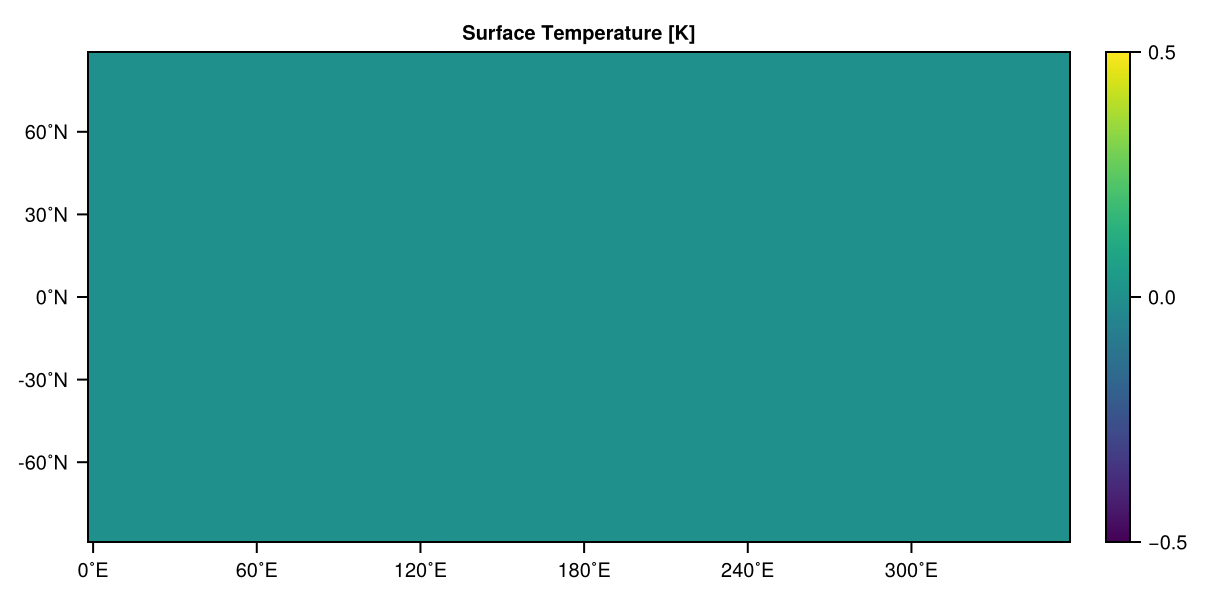

In [38]:
# 7. Simple difference plots
T = simulation_exp.diagnostic_variables.grid.temp_grid[:, 8] - simulation_ctl.diagnostic_variables.grid.temp_grid[:, 8]
heatmap(T, title="Surface Temperature [K], exp - ctl")

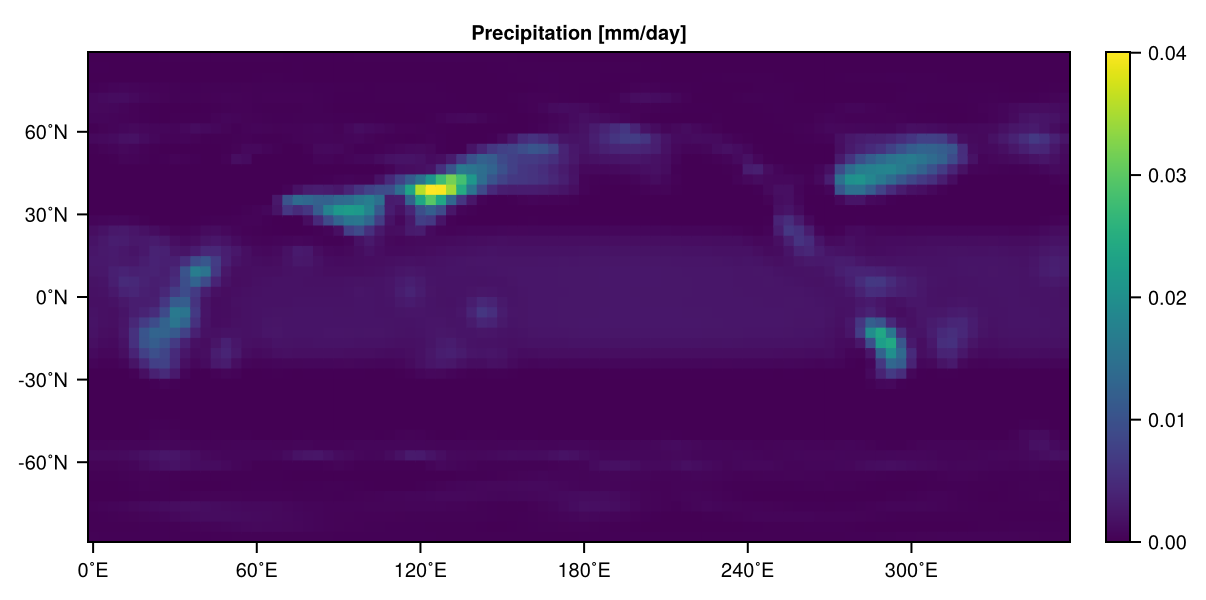

In [31]:
P = simulation.diagnostic_variables.physics.precip_large_scale
heatmap(P, title="Precipitation [mm/day], exp - ctl")

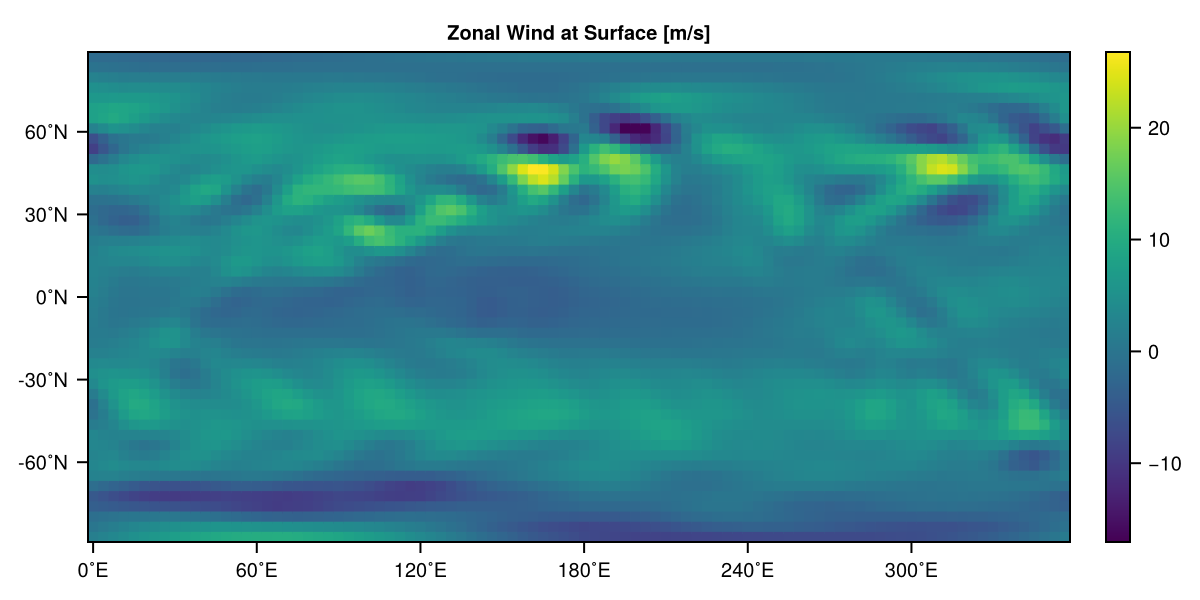

In [32]:
U = simulation.diagnostic_variables.grid.u_grid[:, 8]
heatmap(U, title="Zonal Wind at Surface [m/s], exp - ctl")